In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 10.4 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install plotly

In [ ]:
import tensorflow as tf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import datetime as dt
import yfinance as yf
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
yf.pdr_override()
stock = yf.Ticker('SYN.IC')


In [ ]:
stockh = stock.history(period='max',start="2019-03-04",end="2022-04-08", interval='1d')
#stockh = stock.history(period='max', interval='1d')
stockh

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-04,35.750000,35.750000,35.750000,35.750000,304200,0,0
2019-03-05,35.750000,35.799999,35.750000,35.799999,248200,0,0
2019-03-06,35.799999,35.799999,35.799999,35.799999,0,0,0
2019-03-07,36.200001,36.200001,35.599998,35.599998,1119000,0,0
2019-03-08,35.799999,35.799999,35.799999,35.799999,23800,0,0
...,...,...,...,...,...,...,...
2022-04-01,56.750000,56.750000,56.000000,56.000000,326500,0,0
2022-04-04,57.000000,57.000000,56.000000,56.000000,1250795,0,0
2022-04-05,56.000000,56.000000,54.500000,54.500000,431102,0,0


In [ ]:
stockh.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
stockh.index

DatetimeIndex(['2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11', '2019-03-12', '2019-03-13',
               '2019-03-14', '2019-03-15',
               ...
               '2022-03-25', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07'],
              dtype='datetime64[ns]', name='Date', length=773, freq=None)

In [ ]:
stockh_Open=stockh[['Open']] #this returns a DataFrame, you don't need loc
stockh_dates=stockh.index.to_frame().reset_index(drop=True)
stockh_dates=stockh_dates.apply(pd.to_datetime)

In [ ]:
jon=stock.dividends
divi_dates=jon.index.to_frame().reset_index(drop=True)
divi_dates=divi_dates.apply(pd.to_datetime)
print(divi_dates)

Empty DataFrame
Columns: [Date]
Index: []


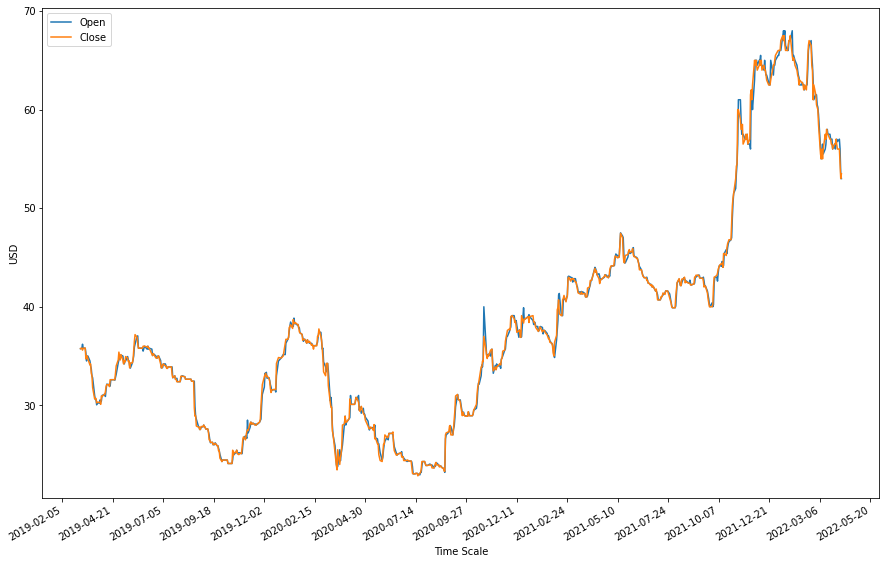

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

x_dates=stockh_dates
plt.plot(x_dates, stockh['Open'], label='Open')
plt.plot(x_dates, stockh['Close'], label='Close')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

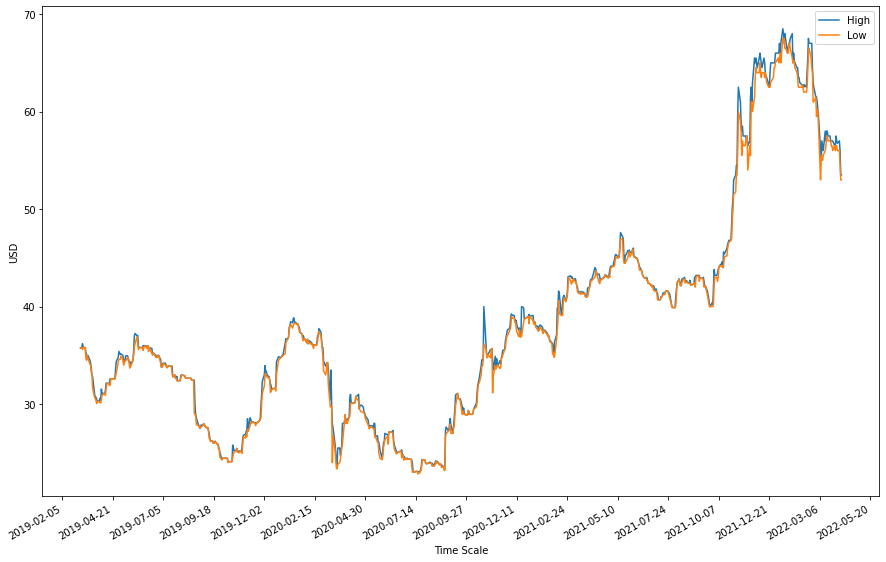

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

x_dates=stockh_dates
plt.plot(x_dates, stockh['High'], label='High')
plt.plot(x_dates, stockh['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
target_y = stockh['Close']
X_feat= stockh.iloc[:,0:4]
h_feat=stockh.iloc[:,3]

In [ ]:
h_ft=np.array(h_feat)
h_ft=h_ft.reshape(-1,1)

In [ ]:
sc= StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns, data=X_ft,index=X_feat.index)


In [ ]:
h_ft=sc.fit_transform(h_ft)

In [ ]:
def lstm_split(data, n_steps):
  X, y=[], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps,:-1])
    y.append(data[i+n_steps-1,-1])

  return np.array(X), np.array(y)


In [ ]:
X1, y1= lstm_split(X_ft.values, n_steps=1)

train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index=X_ft.index

Xtr, Xtst= X1[:split_idx], X1[split_idx:]
ytr, ytst= y1[:split_idx], y1[split_idx:]
Xtrd, Xtstd= date_index[:split_idx], date_index[split_idx:]

print(X1.shape, Xtr.shape, Xtst.shape, ytst.shape)

(773, 1, 3) (619, 1, 3) (154, 1, 3) (154,)


In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(32,input_shape=(Xtr.shape[1],Xtr.shape[2]), activation="relu",return_sequences=True),
    keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 1, 32)             4608      
                                                                 
 dense_24 (Dense)            (None, 1, 1)              33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(Xtr,ytr,epochs=100,batch_size=4,verbose=2,shuffle=False)

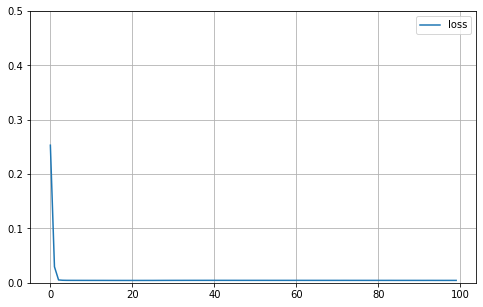

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0, 0.5)
plt.show()

In [ ]:
ypr=model.predict(Xtst)
ypr=ypr.reshape(-1)

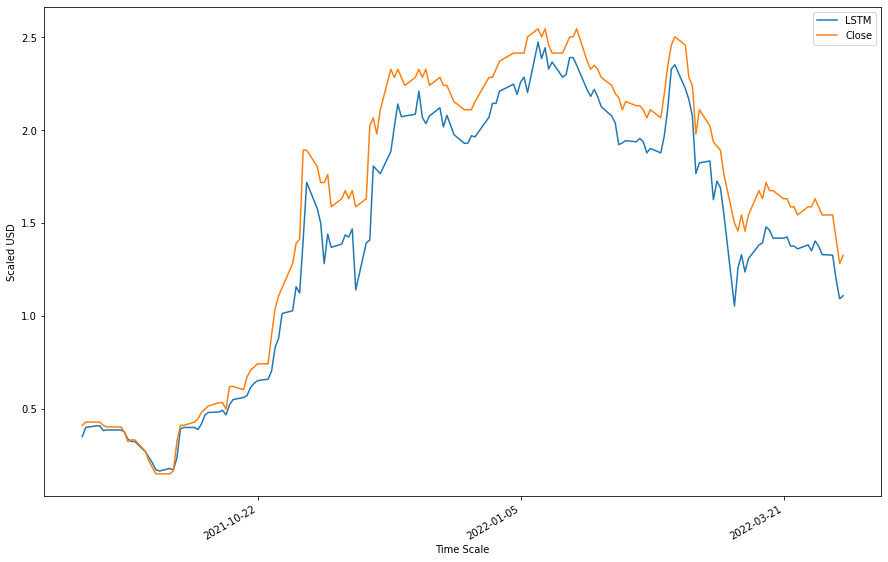

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr)
x_dates=stockh_dates[k:]
h=stockh['Close']
h=h_ft[k:]
#h=h[k:]
plt.plot(x_dates, ypr, label='LSTM')
plt.plot(x_dates, h, label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
rmse=mean_squared_error(ytst,ypr,squared=False)
mape=mean_absolute_percentage_error(ytst,ypr)
print("RSME:",rmse)
print("MAPE:",mape)

RSME: 0.19787570170900529
MAPE: 0.10765684756614774


In [ ]:
model2 = keras.models.Sequential([
    keras.layers.LSTM(50,input_shape=(Xtr.shape[1],Xtr.shape[2]), activation="relu",return_sequences=True),
    keras.layers.LSTM(50,activation="relu"),
    keras.layers.Dense(1)])
model2.compile(loss="mean_squared_error", optimizer="adam")
model2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 1, 50)             10800     
                                                                 
 lstm_31 (LSTM)              (None, 50)                20200     
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model2.fit(Xtr,ytr,epochs=100,batch_size=4,verbose=2,shuffle=False)

In [ ]:
ypr2=model2.predict(Xtst)
ypr2=ypr2.reshape(-1)

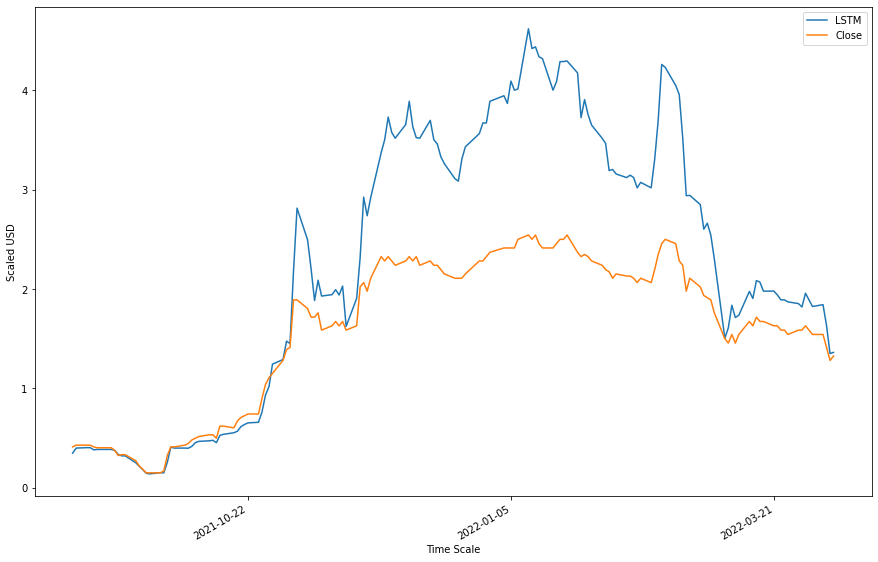

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr)
x_dates=stockh_dates[k:]
h=stockh['Close']
h=h_ft[k:]
#h=h[k:]
plt.plot(x_dates, ypr2, label='LSTM')
plt.plot(x_dates, h, label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
rmse2=mean_squared_error(ytst,ypr2,squared=False)
mape2=mean_absolute_percentage_error(ytst,ypr2)
print("RSME:",rmse2)
print("MAPE:",mape2)

RSME: 0.9320742058961066
MAPE: 0.3303169467280918


In [ ]:
n_steps=10
X1, y1= lstm_split(X_ft.values, n_steps=n_steps)

train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index=X_ft.index

Xtr, Xtst= X1[:split_idx], X1[split_idx:]
ytr, ytst= y1[:split_idx], y1[split_idx:]
Xtrd, Xtstd= date_index[:split_idx], date_index[split_idx:-n_steps+1]

print(X1.shape, Xtr.shape, Xtst.shape,Xtstd.shape, ytst.shape)

(764, 10, 3) (612, 10, 3) (152, 10, 3) (152,) (152,)


In [ ]:
model3 = keras.models.Sequential([
    keras.layers.LSTM(50,input_shape=(Xtr.shape[1],Xtr.shape[2]), activation="relu",return_sequences=True),
    keras.layers.LSTM(50,activation="relu"),
    keras.layers.Dense(1)])
model3.compile(loss="mean_squared_error", optimizer="adam")
model3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 10, 50)            10800     
                                                                 
 lstm_33 (LSTM)              (None, 50)                20200     
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model3.fit(Xtr,ytr,epochs=100,batch_size=4,verbose=2,shuffle=False)

In [ ]:
ypr3=model3.predict(Xtst)
ypr3=ypr3.reshape(-1)

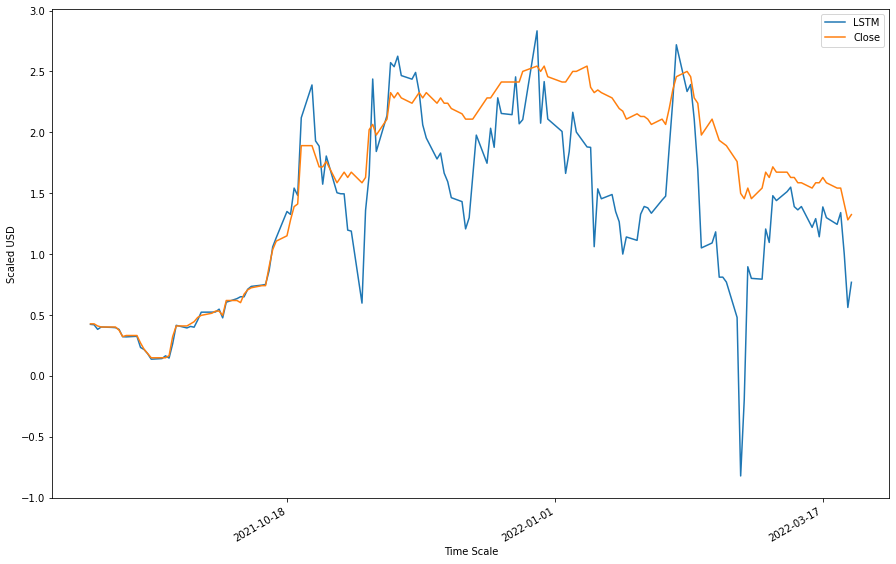

In [ ]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
k=len(Xtr)
thri=len(X1)-len(Xtstd)
x_dates=stockh_dates[k:]
h=stockh['Close']
n=n_steps-1
h=h_ft[thri+n:]
#h=h[k:]
plt.plot(Xtstd, ypr3, label='LSTM')
plt.plot(Xtstd, h, label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
rmse3=mean_squared_error(ytst,ypr3,squared=False)
mape3=mean_absolute_percentage_error(ytst,ypr3)
print("RSME:",rmse3)
print("MAPE:",mape3)

RSME: 0.5287343680560911
MAPE: 0.1968200975453749


Test RMSE: 16.665
Test MAPE: 0.236


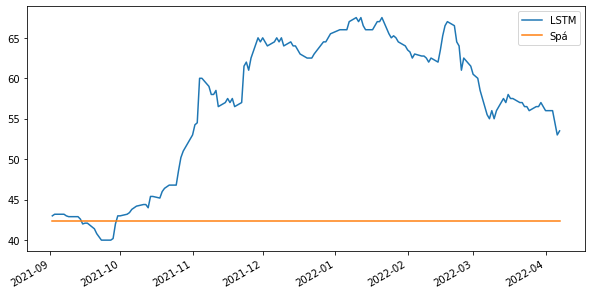

In [ ]:
train_split=0.8
split_idx2= int(np.ceil(len(stockh)*train_split))
tr=stockh[['Close']].iloc[:split_idx2]
tst=stockh[['Close']].iloc[split_idx2:]

tstpr=np.array([tr.rolling(10).mean().iloc[-1]]*len(tst)).reshape((-1,1))

print('Test RMSE: %.3f'%mean_squared_error(tst,tstpr,squared=False))
print('Test MAPE: %.3f'%mean_absolute_percentage_error(tst,tstpr))
f=len(tst)-len(h)
z=n-f
x_dates=stockh_dates[k+z:]


plt.figure(figsize=(10,5))
#plt.plot(tst)
#plt.plot(tstpr)
plt.plot(x_dates, tst, label='LSTM')
plt.plot(x_dates, tstpr, label='Spá')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

Test RMSE: 16.637
Test MAPE: 0.236


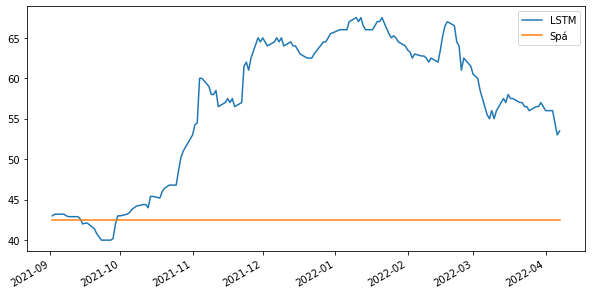

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

J=stockh[['Close']].values
train_split=0.8
split_idx3= int(np.ceil(len(J)*train_split))
tr2=J[:split_idx3]
tst2=J[split_idx3:]
tst_concat=np.array([]).reshape((0,1))

for i in range(len(tst2)):
  tr_fit=np.concatenate((tr2,np.asarray(tst_concat)))
  fit=SimpleExpSmoothing(np.asarray(tr_fit)).fit(smoothing_level=0.2)
  tst_pr=fit.forecast(1)
  tst_concat=np.concatenate((np.asarray(tst_concat),tst_pr.reshape((-1,1))))

print('Test RMSE: %.3f'%mean_squared_error(tst2,tst_concat,squared=False))
print('Test MAPE: %.3f'%mean_absolute_percentage_error(tst2,tst_concat))
f=len(tst2)-len(h)
z=n-f
x_dates=stockh_dates[k+z:]

plt.figure(figsize=(10,5))
#plt.plot(tst)
#plt.plot(tstpr)
plt.plot(x_dates, tst2, label='LSTM')
plt.plot(x_dates, tst_concat, label='Spá')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


## Nett innsláttargrafdót upp á lookið

In [ ]:
choice = input('Write a stock symbol:')
choice = choice.upper()
data = yf.download(tickers=choice, period = 'max', interval = '1d', rounding= True)
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,open = data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name = 'market data'))
fig.add_trace(go.Scatter(x=data.index,y=data['MA5'],opacity=0.7,line=dict(color='blue', width=2),name='MA 5'))

fig.add_trace(go.Scatter(x=data.index,y=data['MA20'],opacity=0.7,line=dict(color='orange', width=2),name='MA 20'))
fig.update_layout(title = choice + ' share price', yaxis_title = 'Stock Price (USD)')
fig.update_xaxes(
rangeslider_visible=True,
rangeselector=dict(
buttons=list([
#dict(count=15, label='15m', step='minute', stepmode='backward'),
#dict(count=45, label='45m', step='minute', stepmode='backward'),
#dict(count=1, label='1h', step='hour', stepmode='backward'),
#dict(count=6, label='6h', step='hour', stepmode='backward'),
dict(count=30, label='30d', step='day', stepmode='backward'),
dict(count=3, label='3m', step='month', stepmode='backward'),
dict(count=6, label='6m', step='month', stepmode='backward'),
dict(count=1, label='YTD', step='year', stepmode='todate'),
dict(count=1, label='1y', step='year', stepmode='backward'),
dict(count=3, label='3y', step='year', stepmode='backward'),
dict(step='all')
])
)
)
fig.show()

Write a stock symbol:EIM.IC
[*********************100%***********************]  1 of 1 completed
